In [103]:
import matplotlib.pyplot as plt
import numpy as np

In [208]:
def get_output(path):
    iter_idx = []
    test_acc = []
    train_acc = []
    test_loss = []
    train_loss = []
    with open(path) as f:
        for line in f:
            if line[:4] == 'Iter':
                #print(line)
                res = ["", ""]
                count = 0
                first_comma = -1
                record = False
                for idx, i in enumerate(line):
                    if i == ',' and first_comma < 0:
                        first_comma = idx
                    if i == '[':
                        record = True
                    elif i == ']':
                        res[count] += ']'
                        record = False
                        count += 1
                    if record:
                        res[count] += i
                test = res[0].split()
                train = res[1].split()
                iter_idx.append(int(line[5:first_comma]))
                test_acc.append(float(test[1][:-1]))
                train_acc.append(float(train[1][:-1]))
                test_loss.append(float(test[3][:-1]))
                train_loss.append(float(train[3][:-1]))
    return train_acc, train_loss, test_acc, test_loss, iter_idx

In [222]:
GD = get_output('logs/GD1.log')
BGD = get_output('logs/BGD1.log')
GGD = get_output('logs/GGD1.log')
GGDCov = get_output('logs/GGDCov1.log')
SGD = get_output('logs/SGD1.log')
GDStoF = get_output('logs/GDStoF1.log')
GDStoCov = get_output('logs/GDStoCov1.log')

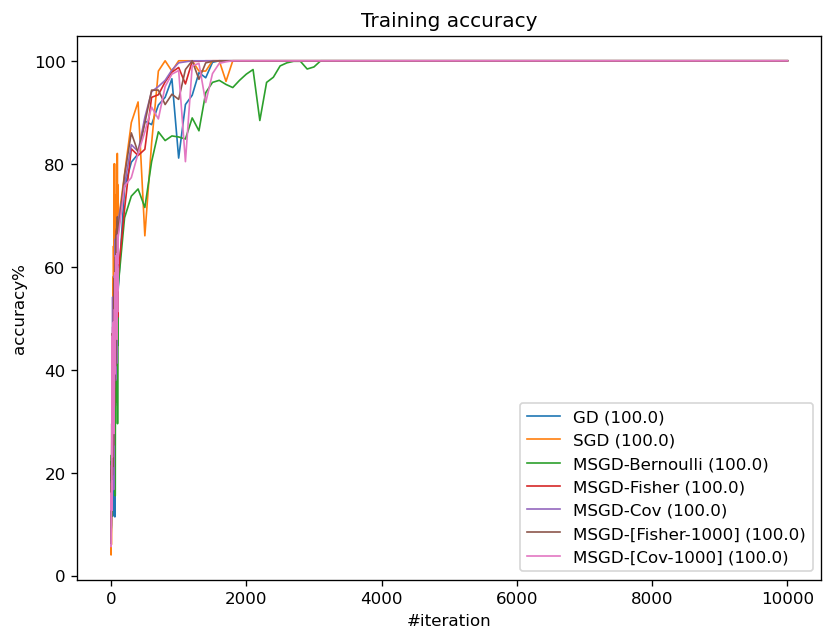

In [223]:
plt.figure(figsize=(8, 6), dpi=120)
plt.plot(GD[-1], GD[0], label='GD ('+str(GD[0][-1])+')',linewidth=1)
plt.plot(GD[-1], SGD[0], label='SGD ('+str(SGD[0][-1])+')',linewidth=1)
plt.plot(GD[-1], BGD[0], label='MSGD-Bernoulli ('+str(BGD[0][-1])+')',linewidth=1)
plt.plot(GD[-1], GGD[0], label='MSGD-Fisher ('+str(GGD[0][-1])+')',linewidth=1)
plt.plot(GD[-1], GGDCov[0], label='MSGD-Cov ('+str(GGDCov[0][-1])+')',linewidth=1)
plt.plot(GD[-1], GDStoF[0], label='MSGD-[Fisher-1000] ('+str(SGD[0][-1])+')',linewidth=1)
plt.plot(GD[-1], GDStoCov[0], label='MSGD-[Cov-1000] ('+str(SGD[0][-1])+')',linewidth=1)
plt.title('Training accuracy')
plt.xlabel('#iteration')
plt.ylabel('accuracy%')
plt.xticks(np.arange(min(GD[-1]), max(GD[-1])+1, 2000))
plt.legend()

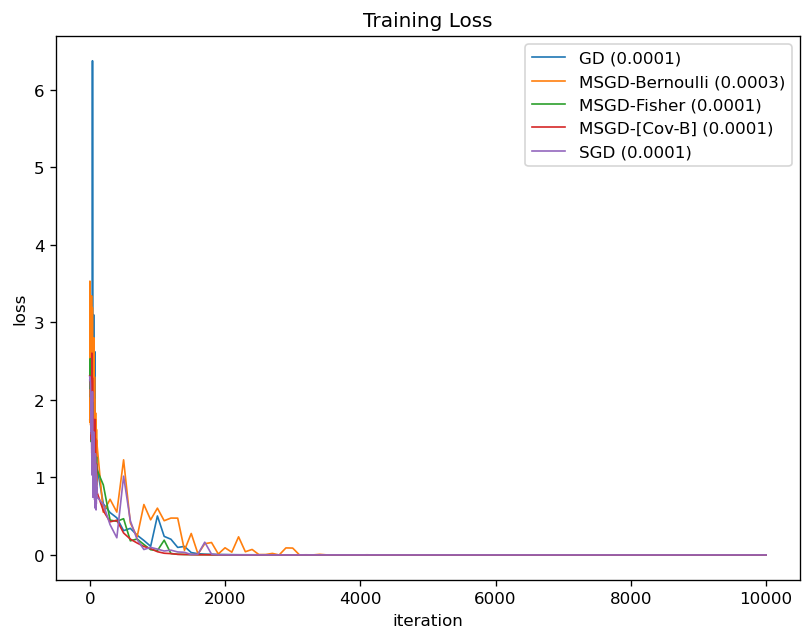

In [227]:
fig = plt.figure(figsize=(8, 6), dpi=120)
ax = fig.add_subplot(1, 1, 1)
ax.plot(GD[-1],GD[1], label='GD ('+str(GD[1][-1])+')',linewidth=1)
ax.plot(GD[-1],BGD[1], label='MSGD-Bernoulli ('+str(BGD[1][-1])+')',linewidth=1)
ax.plot(GD[-1],GGD[1], label='MSGD-Fisher ('+str(GGD[1][-1])+')',linewidth=1)
ax.plot(GD[-1],GGDCov[1], label='MSGD-[Cov-B] ('+str(GGDCov[1][-1])+')',linewidth=1)
ax.plot(GD[-1],SGD[1], label='SGD ('+str(SGD[1][-1])+')',linewidth=1)
ax.set_title('Training Loss')
ax.set_xlabel('iteration')
ax.set_ylabel('loss')
ax.legend()
plt.show()

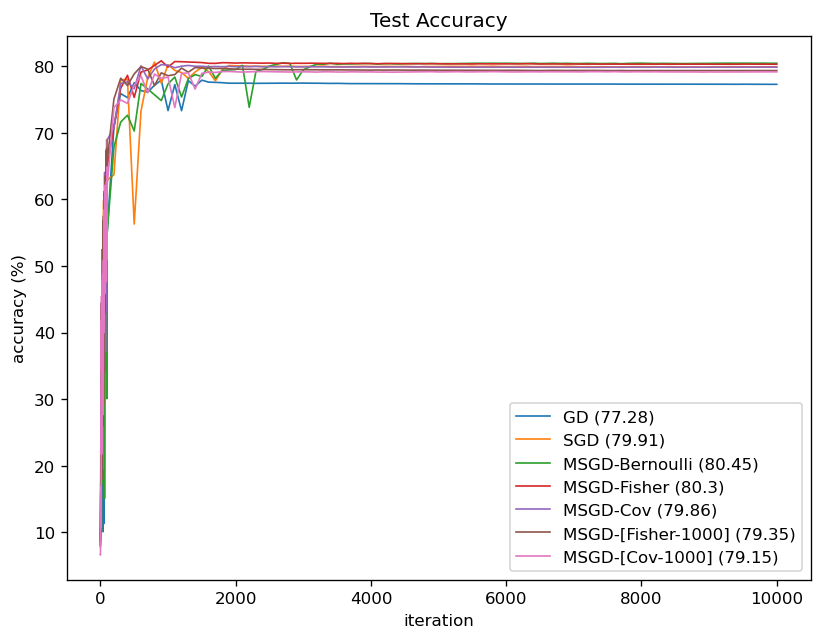

In [228]:
fig = plt.figure(figsize=(8, 6), dpi=120)
ax = fig.add_subplot(1, 1, 1)
plt.plot(GD[-1], GD[2], label='GD ('+str(GD[2][-1])+')',linewidth=1)
plt.plot(GD[-1], SGD[2], label='SGD ('+str(SGD[2][-1])+')',linewidth=1)
plt.plot(GD[-1], BGD[2], label='MSGD-Bernoulli ('+str(BGD[2][-1])+')',linewidth=1)
plt.plot(GD[-1], GGD[2], label='MSGD-Fisher ('+str(GGD[2][-1])+')',linewidth=1)
plt.plot(GD[-1], GGDCov[2], label='MSGD-Cov ('+str(GGDCov[2][-1])+')',linewidth=1)
plt.plot(GD[-1], GDStoF[2], label='MSGD-[Fisher-1000] ('+str(GDStoF[2][-1])+')',linewidth=1)
plt.plot(GD[-1], GDStoCov[2], label='MSGD-[Cov-1000] ('+str(GDStoCov[2][-1])+')',linewidth=1)
ax.set_title('Test Accuracy')
ax.set_xlabel('iteration')
ax.set_ylabel('accuracy (%)')
ax.legend()

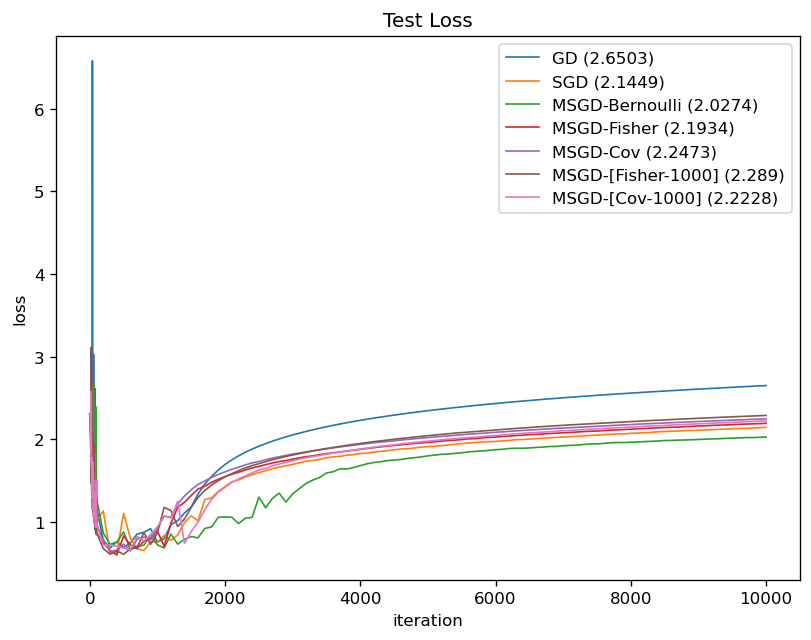

In [226]:
fig = plt.figure(figsize=(8, 6), dpi=120)
ax = fig.add_subplot(1, 1, 1)
plt.plot(GD[-1], GD[3], label='GD ('+str(GD[3][-1])+')',linewidth=1)
plt.plot(GD[-1], SGD[3], label='SGD ('+str(SGD[3][-1])+')',linewidth=1)
plt.plot(GD[-1], BGD[3], label='MSGD-Bernoulli ('+str(BGD[3][-1])+')',linewidth=1)
plt.plot(GD[-1], GGD[3], label='MSGD-Fisher ('+str(GGD[3][-1])+')',linewidth=1)
plt.plot(GD[-1], GGDCov[3], label='MSGD-Cov ('+str(GGDCov[3][-1])+')',linewidth=1)
plt.plot(GD[-1], GDStoF[3], label='MSGD-[Fisher-1000] ('+str(GDStoF[3][-1])+')',linewidth=1)
plt.plot(GD[-1], GDStoCov[3], label='MSGD-[Cov-1000] ('+str(GDStoCov[3][-1])+')',linewidth=1)
ax.set_title('Test Loss')
ax.set_xlabel('iteration')
ax.set_ylabel('loss')
ax.legend()

Text(0, 0.5, 'accuracy (%)')

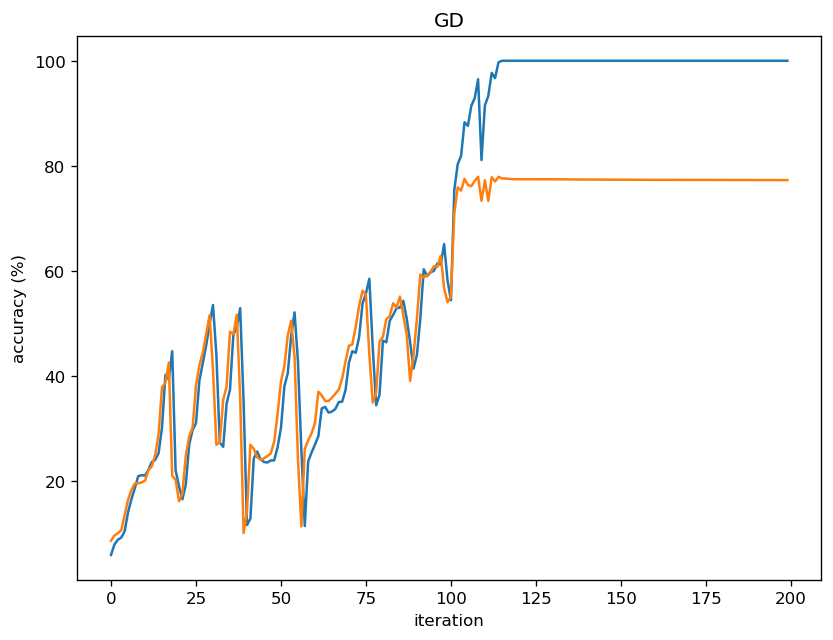

In [193]:
fig = plt.figure(figsize=(8, 6), dpi=120)
ax = fig.add_subplot(1, 1, 1)
ax.plot(GD[0])
ax.plot(GD[2])
ax.set_title('GD')
ax.set_xlabel('iteration')
ax.set_ylabel('accuracy (%)')

Text(0.5, 1.0, 'BGD')

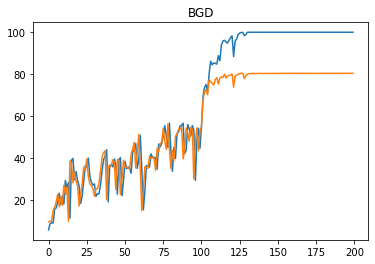

In [194]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.plot(BGD[0])
ax.plot(BGD[2])
ax.set_title('BGD')